In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model

2024-11-06 16:45:44.492903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-06 16:45:44.568274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-06 16:45:44.597013: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 16:45:44.741348: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-06 16:45:46.140089: W tensorflow/compiler/tf2

In [2]:
# Define dataset paths (Local Paths)
train_dir = './Dataset/Train'
validation_dir = './Dataset/Validation'
test_dir = './Dataset/Test'

In [3]:


# Load and preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerators for each dataset
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the data flows for training, validation, and test sets
train_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

validation_flow = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_flow = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


In [4]:

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


/home/matrix/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:

# Train the model
history = model.fit(train_flow, epochs=10, validation_data=validation_flow)


Epoch 1/10


/home/matrix/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 411s 94ms/step - accuracy: 0.8191 - loss: 0.3834 - val_accuracy: 0.8832 - val_loss: 0.2675
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 380s 87ms/step - accuracy: 0.9251 - loss: 0.1809 - val_accuracy: 0.9095 - val_loss: 0.2240
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 391s 89ms/step - accuracy: 0.9425 - loss: 0.1410 - val_accuracy: 0.9091 - val_loss: 0.2140
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 379s 87ms/step - accuracy: 0.9534 - loss: 0.1182 - val_accuracy: 0.9195 - val_loss: 0.1994
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 380s 87ms/step - accuracy: 0.9589 - loss: 0.1015 - val_accuracy: 0.9285 - val_loss: 0.1843
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 385s 88ms/step - accuracy: 0.9640 - loss: 0.0892 - val_accuracy: 0.9245 - val_loss: 0.2009
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 396s 90ms/step - accuracy: 0.9690 - loss: 0.0770 - val_accuracy: 0.9155 - val_loss: 0.2448
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 380s 87ms/step - accuracy: 0.9726 - lo

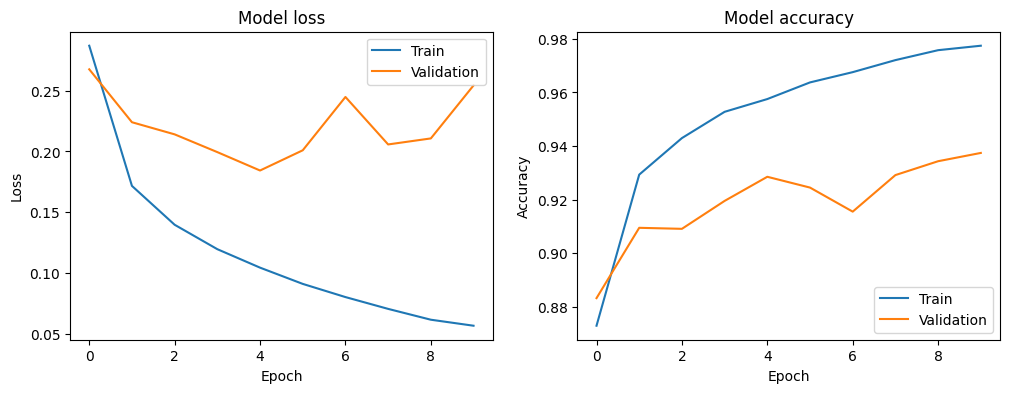

In [7]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(test_flow)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8996 - loss: 0.4417
Test Accuracy: 89.77%


In [10]:
model.save('./model/deepfake_new.h5')

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Evaluate the model on the test data and print the confusion matrix
predictions = model.predict(test_flow)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Optional: Compare with an existing model (if you have another trained model)
# Uncomment the following code if you want to compare with an existing model
# existing_model = load_model('/path/to/existing/model.h5')
# existing_model_predictions = existing_model.predict(test_flow)
# existing_predicted_classes = np.argmax(existing_model_predictions, axis=1)
# existing_accuracy = accuracy_score(true_classes, existing_predicted_classes)
# print(f"Existing Model Accuracy: {existing_accuracy * 100:.2f}%")


341/341 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step
Confusion Matrix:
 [[2870 2622]
 [2848 2565]]
Classification Report:
               precision    recall  f1-score   support

        Fake       0.50      0.52      0.51      5492
        Real       0.49      0.47      0.48      5413

    accuracy                           0.50     10905
   macro avg       0.50      0.50      0.50     10905
weighted avg       0.50      0.50      0.50     10905

Test Accuracy: 49.84%


341/341 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step


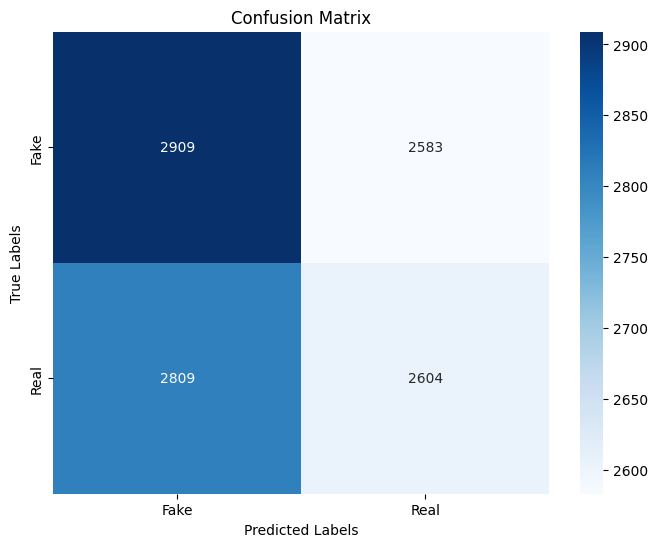

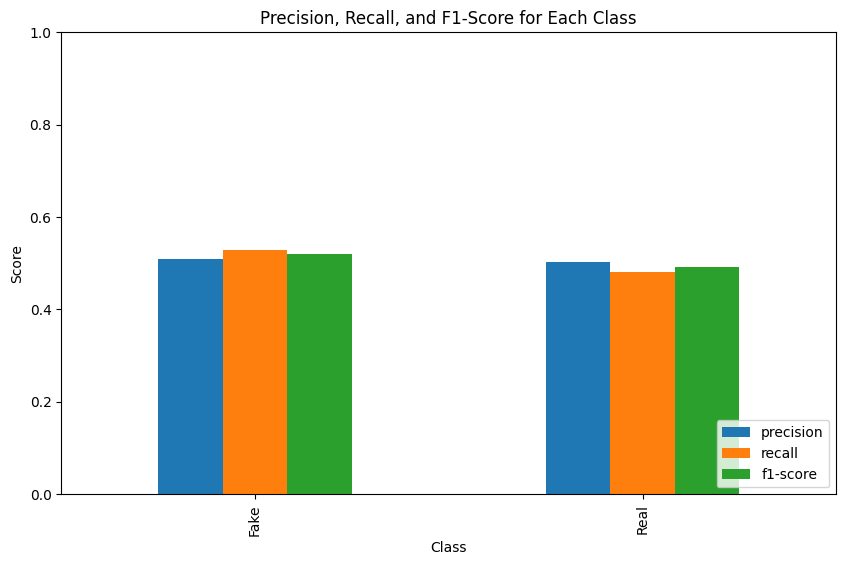

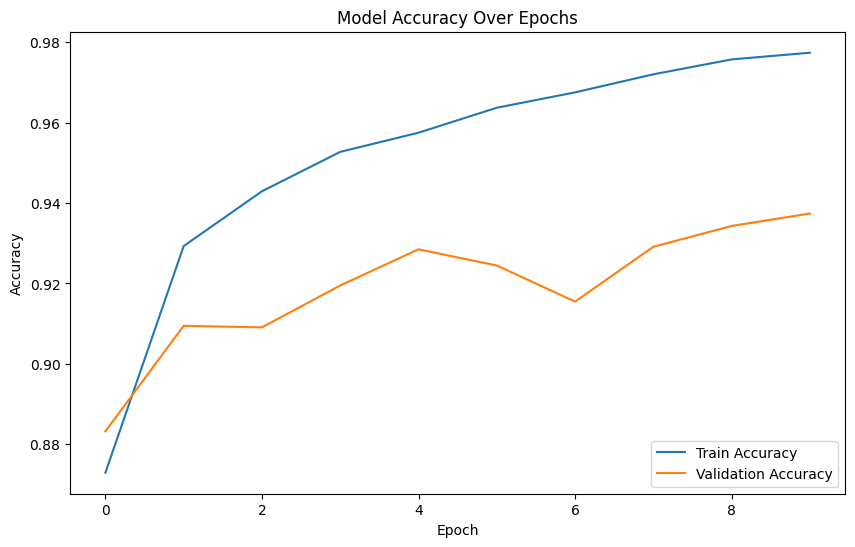

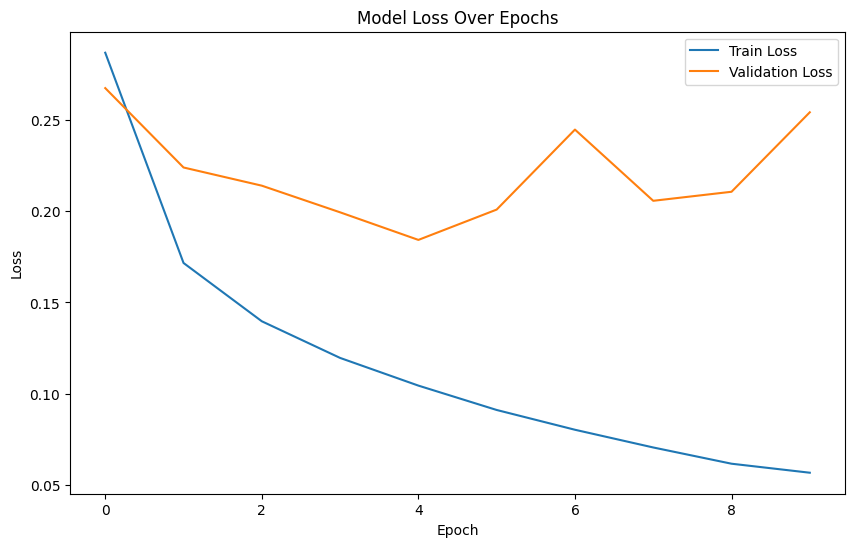

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Predictions and metrics calculation
predictions = model.predict(test_flow)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)

# Extracting metrics for each class
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.loc[class_labels, ['precision', 'recall', 'f1-score']]

# Plotting Precision, Recall, and F1-Score
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Accuracy over epochs (optional, only if you tracked it)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [11]:

# Get an image and its label from the test flow
img, label = next(test_flow)
label_ = label.argmax(axis=1)


In [12]:
label_

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [16]:

# Make predictions using the trained CNN model
res = model.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [17]:
res

array([[1.8450964e-05, 9.9998146e-01],
       [9.7254032e-01, 2.7459666e-02],
       [7.3454293e-10, 9.9999994e-01],
       [1.8113283e-12, 9.9999994e-01],
       [9.9999982e-01, 1.3863119e-07],
       [9.9999934e-01, 6.1908656e-07],
       [2.4741352e-02, 9.7525865e-01],
       [8.8902086e-02, 9.1109794e-01],
       [4.5202652e-01, 5.4797351e-01],
       [8.7052907e-11, 9.9999994e-01],
       [9.9999994e-01, 2.3476233e-14],
       [9.9999994e-01, 5.7650645e-10],
       [7.6341438e-01, 2.3658571e-01],
       [3.3371720e-07, 9.9999958e-01],
       [1.3905497e-02, 9.8609447e-01],
       [9.9908131e-01, 9.1873185e-04],
       [1.0594213e-04, 9.9989396e-01],
       [9.9995977e-01, 4.0196675e-05],
       [9.1160038e-11, 9.9999994e-01],
       [7.6397222e-01, 2.3602776e-01],
       [6.7775563e-04, 9.9932224e-01],
       [1.2210038e-02, 9.8779005e-01],
       [1.2225241e-05, 9.9998766e-01],
       [9.9450082e-01, 5.4991990e-03],
       [3.5642792e-04, 9.9964350e-01],
       [9.9384928e-01, 6.

In [18]:

# Determine the predicted class
class_ = res.argmax(axis=1)
class_


array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [19]:

# Print the results based on the predicted and actual class
if class_[0] == 0:
    if label_[0] == 0:
        print("Actual class is fake, predicted class is fake")
    else:
        print("Actual class is real, predicted class is fake")
else:
    if label_[0] == 0:
        print("Actual class is fake, predicted class is real")
    else:
        print("Actual class is real, predicted class is real")


Actual class is real, predicted class is real


In [20]:
# Print the results based on the predicted and actual class
if class_[0] == 0:
    print("Predicted class is Fake")
else:
    print("Predicted class is Real")

Predicted class is Real


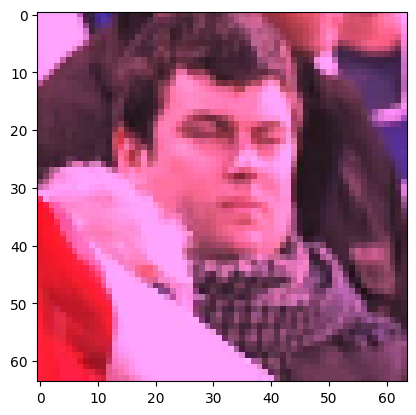

In [21]:

# Display the image
plt.imshow(img[0])
plt.show()

In [22]:
model.save('./model/trained_model.h5')

In [23]:
len(class_)

32

In [24]:
TRAIN_PATH_1 = './Dataset/Train/Real/real_100.jpg'
TRAIN_PATH_2 ='./Dataset/Train/Fake/fake_10001.jpg'

In [25]:
from PIL import Image
import numpy as np

In [27]:
img1 = Image.open(TRAIN_PATH_1)
img1 = img1.resize((64, 64), Image.Resampling.NEAREST)
# Convert the image to a numpy array and add a batch dimension
img1_array = np.array(img1)
img1_array = np.expand_dims(img1_array, axis=0)

# Make prediction using the model
res = model.predict(img1_array)
print(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[0. 1.]]


In [30]:
img1 = Image.open('./vyratkoli2/Virat_Kohli_Riyal.jpeg')
img1 = img1.resize((64, 64), Image.Resampling.NEAREST)

img1_array = np.array(img1)
img1_array = np.expand_dims(img1_array, axis=0)

# Predict using the model
res = model.predict(img1_array)

# Fake 1
# Real 0
print(res[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1.0


In [31]:
img2 = Image.open('./vyratkoli2/viratkohli.jpeg')
img2 = img2.resize((64, 64), Image.Resampling.NEAREST)

img1_array = np.array(img2)
img1_array = np.expand_dims(img1_array, axis=0)

# Predict using the model
res = model.predict(img1_array)

# Fake 1
# Real 0
print(res[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0.0


# Analysis

In [3]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

In [4]:

# Define the paths for Train and Test folders
train_path = './Dataset/Train'
test_path = './Dataset/Test'

# Define categories
categories = ['Fake', 'Real']

In [5]:
# Function to count the number of images in each category
def count_images(path, categories):
    data_count = {}
    for category in categories:
        folder = os.path.join(path, category)
        count = len(os.listdir(folder))
        data_count[category] = count
    return data_count

# Count images in Train and Test folders
train_counts = count_images(train_path, categories)
test_counts = count_images(test_path, categories)

# Display counts
print("Train Image Counts:", train_counts)
print("Test Image Counts:", test_counts)

Train Image Counts: {'Fake': 70001, 'Real': 70001}
Test Image Counts: {'Fake': 5492, 'Real': 5413}


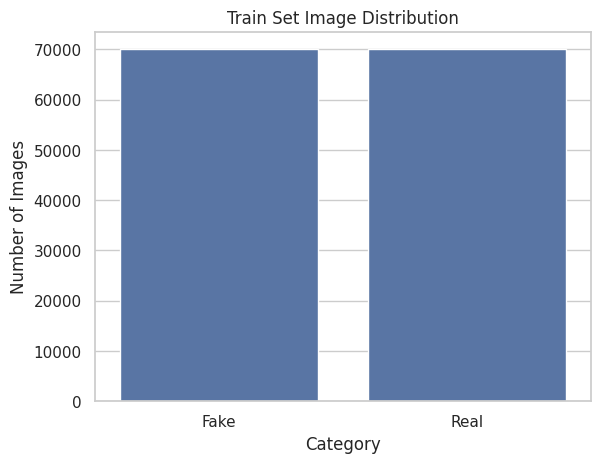

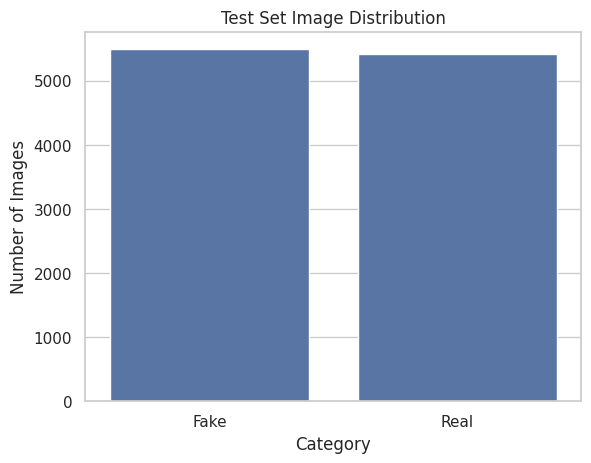

In [6]:
# Visualize the distribution using bar plots
def plot_distribution(data_count, title):
    sns.barplot(x=list(data_count.keys()), y=list(data_count.values()))
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.show()

# Plot distribution for Train and Test sets
plot_distribution(train_counts, 'Train Set Image Distribution')
plot_distribution(test_counts, 'Test Set Image Distribution')

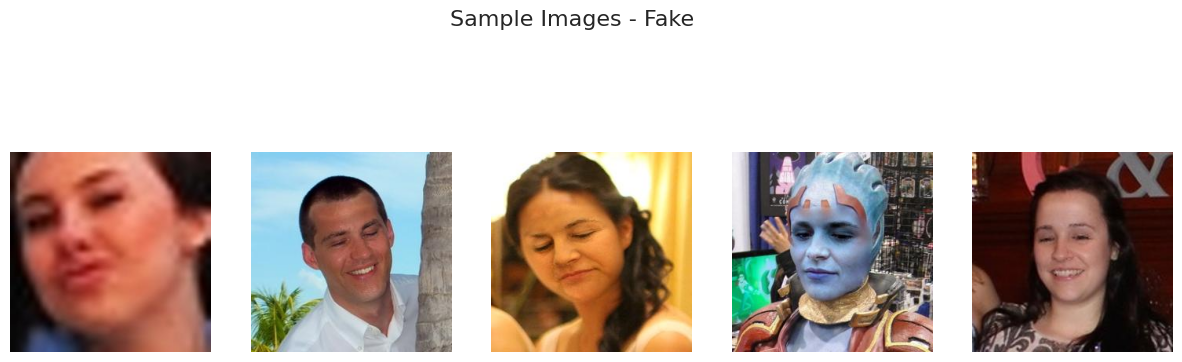

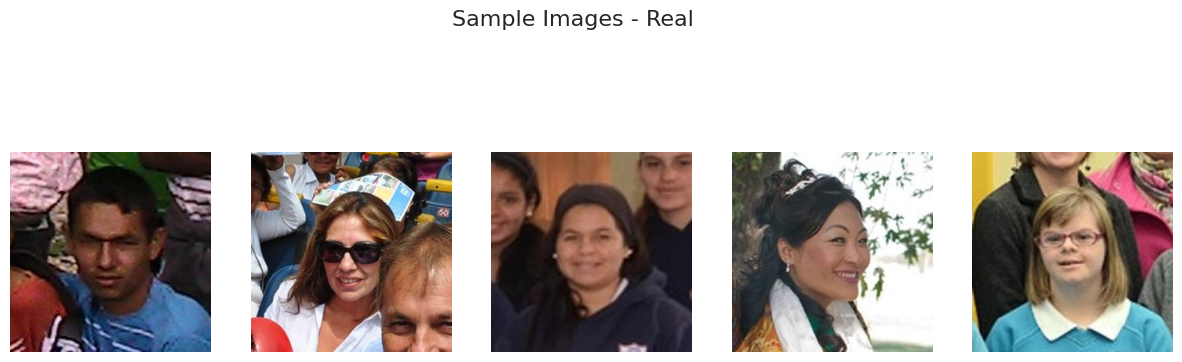

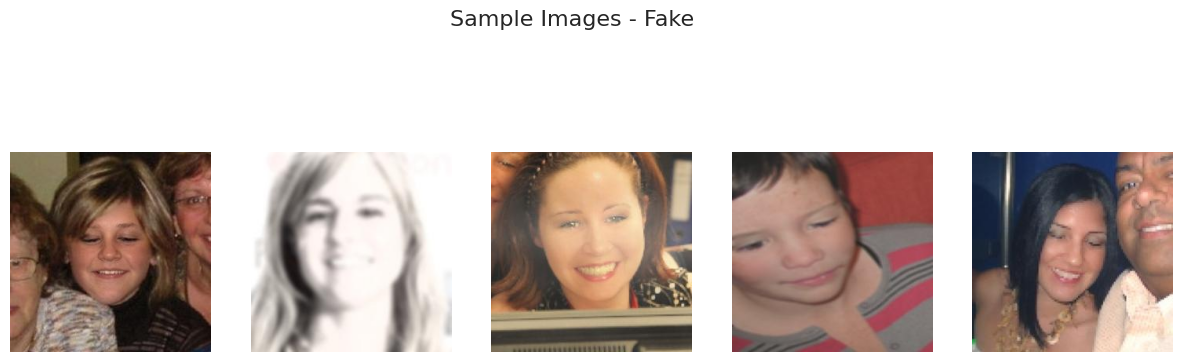

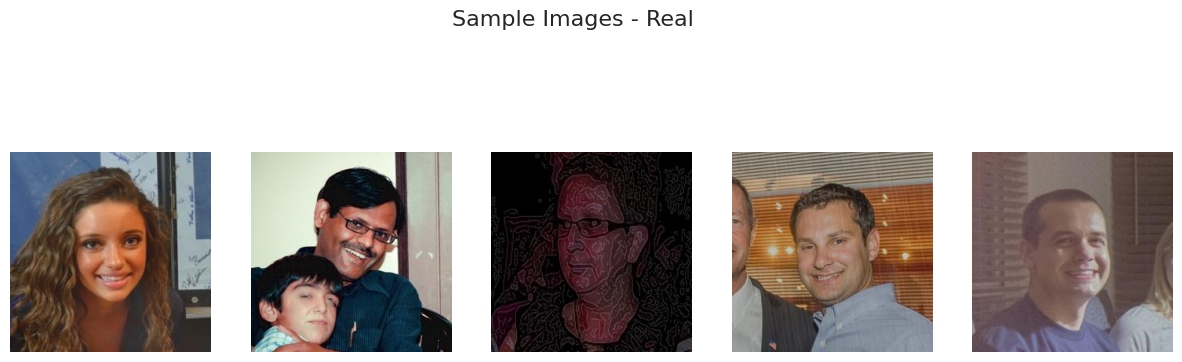

In [7]:
# Function to display sample images from each category
def display_samples(path, categories, num_samples=5):
    for category in categories:
        folder = os.path.join(path, category)
        images = os.listdir(folder)
        
        plt.figure(figsize=(15, 5))
        plt.suptitle(f'Sample Images - {category}', fontsize=16)
        
        for i in range(num_samples):
            image_path = os.path.join(folder, images[i])
            plt.subplot(1, num_samples, i + 1)
            img = imread(image_path)
            plt.imshow(img)
            plt.axis('off')
        
        plt.show()

# Display samples from Train and Test sets
display_samples(train_path, categories)
display_samples(test_path, categories)


In [8]:
import random

# Function to sample a subset of images from each category
def sample_images(path, categories, sample_size=1000):
    sampled_images = {category: [] for category in categories}
    for category in categories:
        folder = os.path.join(path, category)
        images = os.listdir(folder)
        sampled_images[category] = random.sample(images, min(sample_size, len(images)))
    return sampled_images

# Sample images from the Train set
sample_size = 1000  # Adjust the sample size as needed
train_sampled_images = sample_images(train_path, categories, sample_size)
#print(train_sampled_images)


In [9]:
from collections import Counter

# Function to get image dimensions for sampled images
def get_image_dimensions_sampled(path, sampled_images):
    dimensions = {category: [] for category in sampled_images}
    for category, images in sampled_images.items():
        for image_name in images:
            image_path = os.path.join(path, category, image_name)
            img = imread(image_path)
            dimensions[category].append(img.shape[:2])
    return dimensions

def display_common_dimensions(dimensions, title):
    for category, dims in dimensions.items():
        counter = Counter(dims)
        common_dims = counter.most_common(5)
        print(f"{title} - {category}:")
        for dim, count in common_dims:
            print(f"Dimension: {dim}, Count: {count}")
        print()

# Get image dimensions for sampled Train set
train_dimensions_sampled = get_image_dimensions_sampled(train_path, train_sampled_images)

# Display common dimensions for sampled images
display_common_dimensions(train_dimensions_sampled, "Sampled Train Set")


Sampled Train Set - Fake:
Dimension: (256, 256), Count: 1000

Sampled Train Set - Real:
Dimension: (256, 256), Count: 1000



In [10]:
# Display color channel analysis
def plot_color_channels(color_channels, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(title, fontsize=16)
    colors = ['Red', 'Green', 'Blue']
    
    for i, color in enumerate(colors):
        for category in categories:
            channel_values = [channels[i] for channels in color_channels[category]]
            sns.histplot(channel_values, ax=axes[i], label=category, kde=True)
        axes[i].set_title(f'{color} Channel')
        axes[i].legend()

    plt.show()

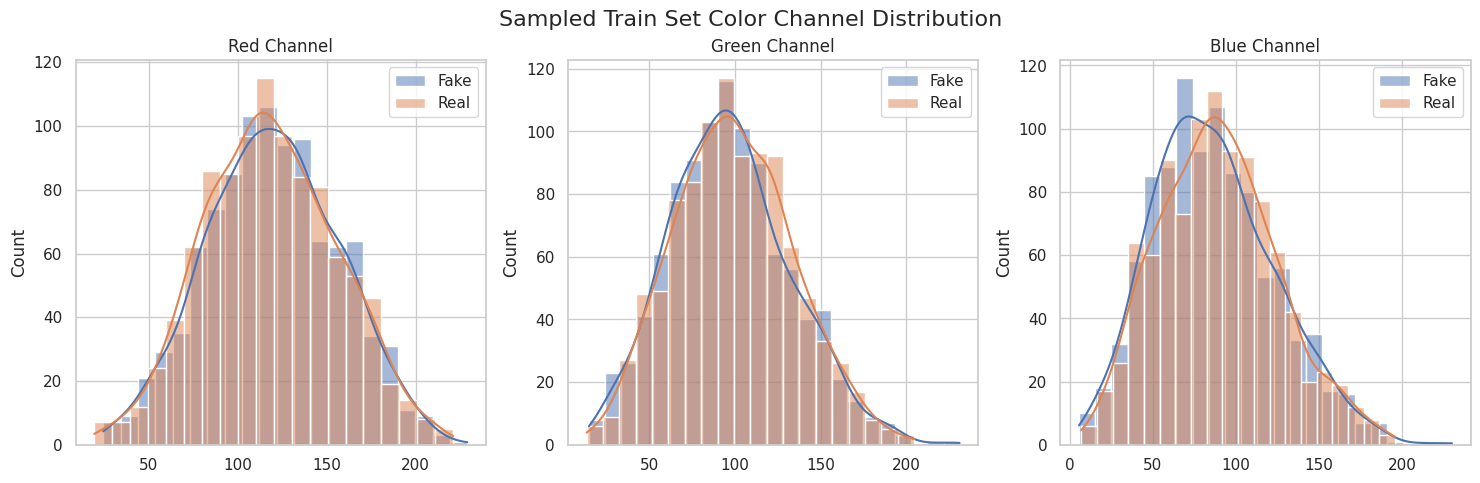

In [11]:
# Function to analyze color channels for sampled images
def analyze_color_channels_sampled(path, sampled_images):
    color_channels = {category: [] for category in sampled_images}
    for category, images in sampled_images.items():
        for image_name in images:
            image_path = os.path.join(path, category, image_name)
            img = imread(image_path)
            if img.ndim == 3:  # Ensure the image has 3 channels
                red_channel = img[:, :, 0].mean()
                green_channel = img[:, :, 1].mean()
                blue_channel = img[:, :, 2].mean()
                color_channels[category].append((red_channel, green_channel, blue_channel))
    return color_channels

# Analyze color channels for sampled Train set
train_color_channels_sampled = analyze_color_channels_sampled(train_path, train_sampled_images)

# Plot color channels for sampled images
plot_color_channels(train_color_channels_sampled, "Sampled Train Set Color Channel Distribution")


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

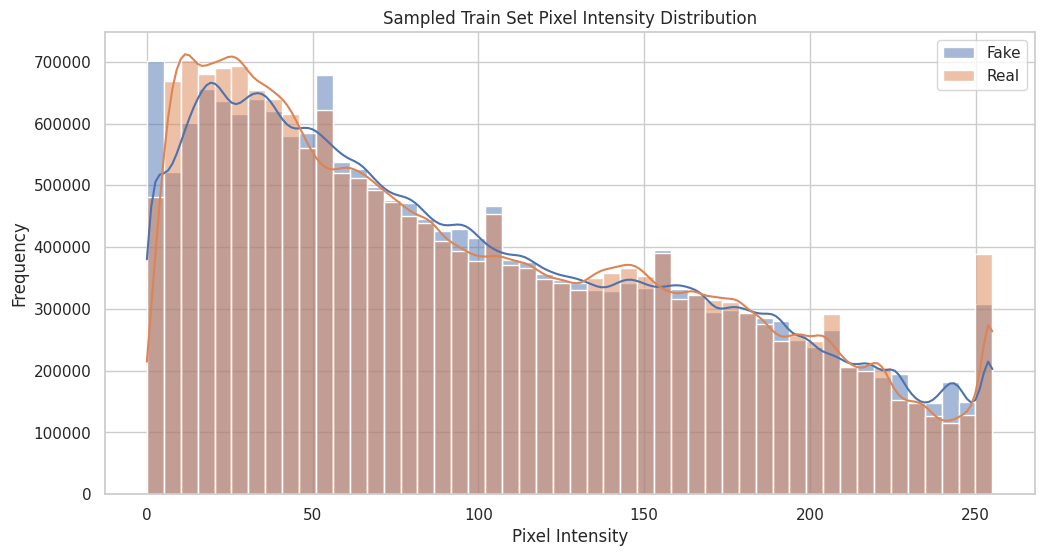

In [5]:
import random

# Set seaborn style for better visual quality
sns.set(style="whitegrid")

# Define categories and dataset path
categories = ['Fake', 'Real']  # Replace with your actual class names if different
train_path = './Dataset/Train'  # Update this with the actual path to your training dataset

# Function to sample a subset of images from each category
def sample_images(path, categories, sample_size=100):
    sampled_images = {category: [] for category in categories}
    for category in categories:
        folder = os.path.join(path, category)
        images = os.listdir(folder)
        sampled_images[category] = random.sample(images, min(sample_size, len(images)))
    return sampled_images

# Sample images from the Train set
train_sampled_images = sample_images(train_path, categories, sample_size=100)  # Adjust sample size if needed

# Function to analyze pixel intensity for sampled images
def analyze_pixel_intensity_sampled(path, sampled_images):
    pixel_intensity = {category: [] for category in sampled_images}
    for category, images in sampled_images.items():
        for image_name in images:
            image_path = os.path.join(path, category, image_name)
            img = imread(image_path)
            pixel_values = img.flatten()  # Flatten the image to a 1D array of pixel values
            pixel_intensity[category].append(pixel_values)
    return pixel_intensity

# Analyze pixel intensity for the sampled Train set
train_pixel_intensity_sampled = analyze_pixel_intensity_sampled(train_path, train_sampled_images)

# Function to display pixel intensity distribution for each category
def plot_pixel_intensity(pixel_intensity, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    for category in categories:
        pixel_values = np.concatenate(pixel_intensity[category])  # Flattened list of all pixel intensities
        sns.histplot(pixel_values, ax=ax, label=category, kde=True, bins=50)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.show()

# Plot pixel intensity for sampled images
plot_pixel_intensity(train_pixel_intensity_sampled, "Sampled Train Set Pixel Intensity Distribution")


In [7]:
import os

# Define the dataset directories
train_dir = './Dataset/Train' # Update this path
test_dir = './Dataset/Test'   # Update this path

# Function to count the number of images in each category
def count_images(directory):
    fake_count = len(os.listdir(os.path.join(directory, 'Fake')))
    real_count = len(os.listdir(os.path.join(directory, 'Real')))
    return fake_count, real_count

# Count images in Train and Test sets
train_fake_count, train_real_count = count_images(train_dir)
test_fake_count, test_real_count = count_images(test_dir)

# Display the counts
print(f"Train Set: Fake Images - {train_fake_count}, Real Images - {train_real_count}")
print(f"Test Set: Fake Images - {test_fake_count}, Real Images - {test_real_count}")


Train Set: Fake Images - 70001, Real Images - 70001
Test Set: Fake Images - 5492, Real Images - 5413


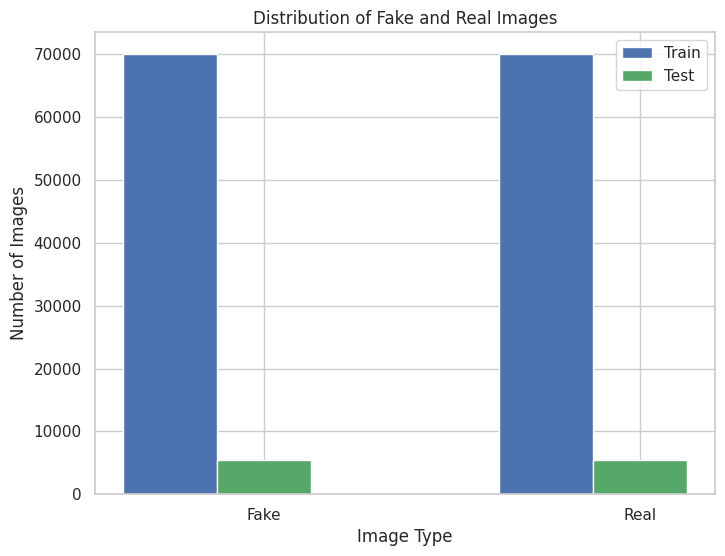

In [8]:
data = {'Train': [train_fake_count, train_real_count],
        'Test': [test_fake_count, test_real_count]}

X = np.arange(2)
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(X + 0.00, data['Train'], color='b', width=0.25, label='Train')
ax.bar(X + 0.25, data['Test'], color='g', width=0.25, label='Test')

ax.set_xticks(X + 0.25)
ax.set_xticklabels(['Fake', 'Real'])
ax.legend()
ax.set_title('Distribution of Fake and Real Images')
ax.set_xlabel('Image Type')
ax.set_ylabel('Number of Images')

plt.show()

In [2]:
import os
from PIL import Image  # Importing Image from PIL

# Define dataset directories
train_dir = './Dataset/Train'  # Update this path

# Define paths for 'Fake' and 'Real' subdirectories
train_fake_dir = os.path.join(train_dir, 'Fake')
train_real_dir = os.path.join(train_dir, 'Real')

# Initialize lists to store image sizes
fake_image_sizes = []
real_image_sizes = []

# Collect image sizes for 'Fake' images
for filename in os.listdir(train_fake_dir):
    img = Image.open(os.path.join(train_fake_dir, filename))
    fake_image_sizes.append(img.size)

# Collect image sizes for 'Real' images
for filename in os.listdir(train_real_dir):
    img = Image.open(os.path.join(train_real_dir, filename))
    real_image_sizes.append(img.size)

# Display unique sizes for Fake and Real images
print("Fake Image Sizes:")
print(set(fake_image_sizes))

print("\nReal Image Sizes:")
print(set(real_image_sizes))


Fake Image Sizes:
{(256, 256)}

Real Image Sizes:
{(256, 256)}


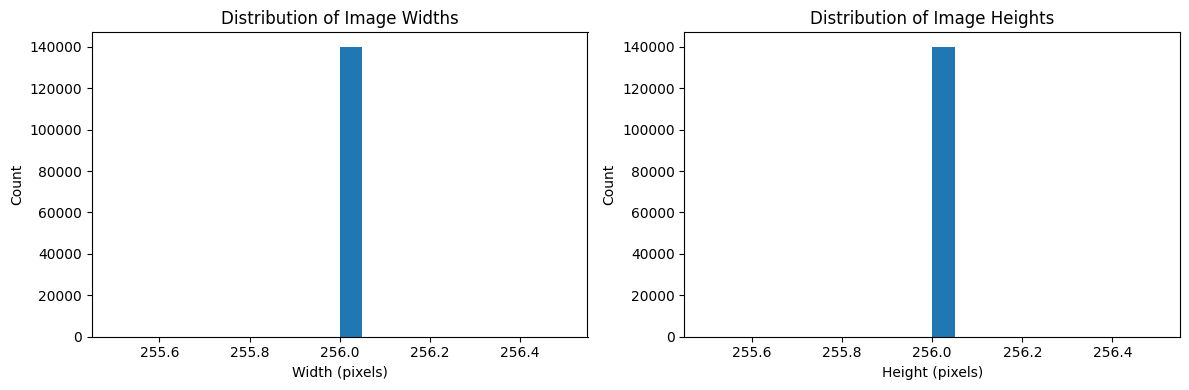

In [4]:
import matplotlib.pyplot as plt
all_image_sizes = fake_image_sizes + real_image_sizes
width_values = [size[0] for size in all_image_sizes]
height_values = [size[1] for size in all_image_sizes]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(width_values, bins=20)
ax[0].set_title('Distribution of Image Widths')
ax[0].set_xlabel('Width (pixels)')
ax[0].set_ylabel('Count')

ax[1].hist(height_values, bins=20)
ax[1].set_title('Distribution of Image Heights')
ax[1].set_xlabel('Height (pixels)')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()